In [14]:
import pandas as pd
import os
from tqdm import tqdm
import urllib.request
import numpy as np
import sys

In [6]:
df = pd.read_csv('dataset_curso.csv')

df.head()

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label
0,portland water supply to be flushed after teen...,1.397748e+09,239vnh,https://external-preview.redd.it/h_E8kwTPvvR6L...,NaN,6.0,5,0.78,1
1,when all the pundits said clinton would win th...,1.528325e+09,8p52o3,https://preview.redd.it/egrrssrbkg211.jpg?widt...,NaN,1.0,4,0.84,0
2,king femme dirty kitty this is my first time i...,1.563147e+09,cd9y6e,https://preview.redd.it/f5wxn4b5uca31.jpg?widt...,NaN,2.0,33,1.00,0
3,angry human yelling at peaceful human,1.439152e+09,3gduaq,https://external-preview.redd.it/8OkDeADBmg78e...,NaN,10.0,23,0.73,1
4,oh i get it now haha,1.428162e+09,cq10fmf,http://i.imgur.com/fpuSTrf.jpg,31c39q,NaN,1,NaN,0


In [8]:
df['len'] = df['clean_title'].apply(len)

In [20]:
df['hasImage'] = df['image_url'].str.startswith('https')

<Axes: >

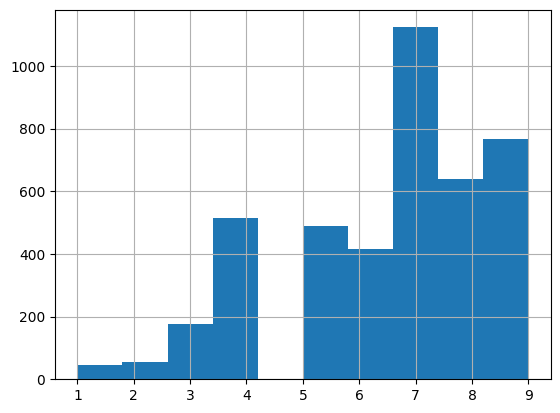

In [13]:
df[df['len'] < 10]['len'].hist()

In [21]:
df = df.replace(np.nan, '', regex=True)
df.fillna('', inplace=True)

pbar = tqdm(total=len(df))

FAILED = []

if not os.path.exists("images"):
    os.makedirs("images")
for index, row in df.iterrows():
    if row["hasImage"] == True and row["image_url"] != "" and row["image_url"] != "nan":
        image_url = row["image_url"]
        try:
            urllib.request.urlretrieve(image_url, "images/" + row["id"] + ".jpg")
        except:
            FAILED.append(index)
    pbar.update(1)
print("done")

  0%|          | 0/56400 [00:08<?, ?it/s]


done
